This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59
- Part 2: Mon 20.2 at 23:59
- Part 3: Mon 6.3 at 23:59

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [1]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print (uuid.uuid1())

The id code is: 64cd9c42-9dcb-11ed-9c52-b4b5b676d417


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction (1 p)

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell 
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder 
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total) 
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV) 
- plot one example image of each rice species, including the contour 

In [2]:
# import liberies 
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy as sp 
import pandas as pd

%matplotlib inline

In [3]:
# walk through './data' folder

data_dir = '../data'

for dir, dirname, filesname, in os.walk(data_dir):
    print(f'Found {len(dirname)} directories and {len(filesname)} images in {dir}')

Found 3 directories and 0 images in ../data
Found 0 directories and 15000 images in ../data/Arborio
Found 0 directories and 15000 images in ../data/Basmati
Found 0 directories and 15000 images in ../data/Jasmine


In [4]:
# define data preparation functions here
def get_image_dir(data_dir):
    """get images'path 

    Args:
        data_dir (str): folder of image folder
    Returns:
        dir_name(nparray): path of images folder
        labels(nparray): image label
    """
    dir_name, labels = list(), list()
    for dir, dirname, filesname in os.walk(data_dir):
        labels.append(dirname)
        img_names = [os.path.join(dir, filename) for filename in filesname]
        dir_name.append(img_names)
    
    return np.asanyarray(dir_name[1:]), np.asarray(labels[0])
  

def read_data(img_dir):
    """read image data from directory

    Args:
        img_dir (nparray): images folder

    Returns:
        img_data (nparray): image data 
    """
    img_data = list()
    for dir in img_dir:
        imgs = [cv2.imread(path) for path in dir]
        img_data.append(imgs)
    
    return np.asanyarray(img_data)
        


def visualize_contour(img, text):
    """visualize contour of input image with fixed thresholding
    """
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(img) # black background and white foreground
    ax1.set_title(f"origin : {text}")
    ax1.axis("off")

    img2 = img.copy()
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) # convert RGB image into gray-scale 
    _, binary = cv2.threshold(src=gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY) # fixed thresholding "set pixel above 100 to 255, otherwise 0"
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img2, contours, -1, color=(255, 0, 0), thickness=2) # draw all contours on gray-scale image

    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(img2)
    ax2.set_title("contours(thresh)")
    ax2.axis("off")


In [5]:
# shuffle and load 100 images for each rice species
img_dir, labels = get_image_dir(data_dir)

[np.random.shuffle(dir) for dir in img_dir] 

img_dir = img_dir[: , :100] 

data = read_data(img_dir)

print(f'SHAPE OF DATA : {data.shape}')
print(f'LABELS : {labels}')

SHAPE OF DATA : (3, 100, 250, 250, 3)
LABELS : ['Arborio' 'Basmati' 'Jasmine']


In [6]:
img_dir[0][1]

'../data/Arborio/Arborio (13681).jpg'

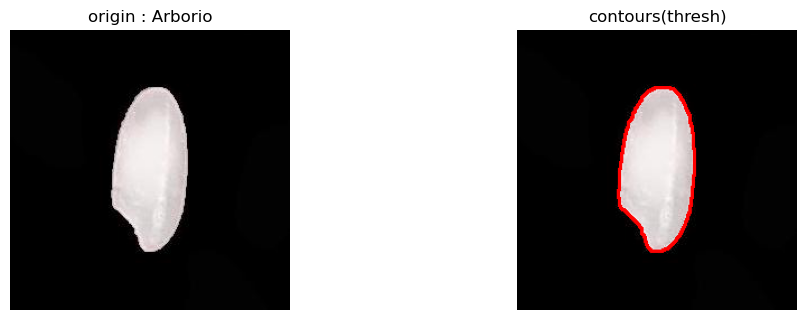

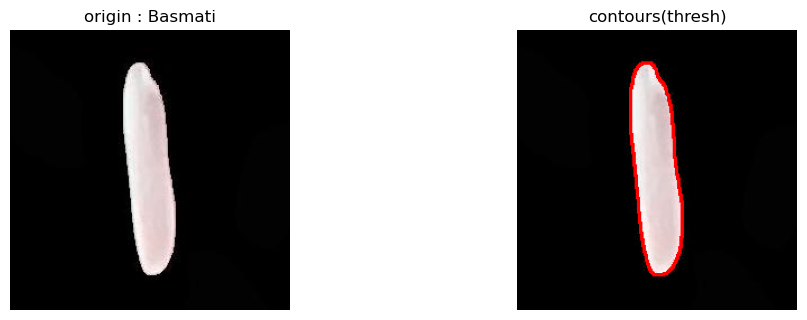

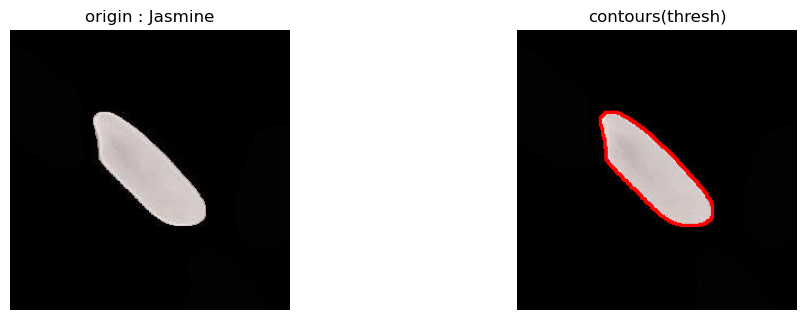

In [7]:
# visualize example image of each rice species, alongside with contour 
for folder, label in zip(data, labels):
    idx = np.random.choice(len(folder), 1)[0]
    img = folder[idx]
    visualize_contour(img, label)



## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel 
    - Variance for each RGB color channel 
    - Skewness for each RGB color channel 
    - Kurtosis for each RGB color channel 
    - Entropy for each RGB color channel 
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV) 
- Plot one example image of each rice species including the fitted ellipse 
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse 
    - the minor axis length of the ellipse 
    - area inside the contour (you can use e.g. *contourArea* from OpenCV) 
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV) 
    - roundness 
    - aspect ratio 
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns.  <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder. 

In [8]:
# define features extraction functions here

def extract_features(imgs):
    """extract color and dimension features from image

    Args:
        imgs (nparray): input images

    Returns:
        color_features (tuple): mean[r:g:b], var[r:g:b], skew[r:g:b], kurt[r:g:b], entropy[r:g:b]
        dimension features (tuple): major_axis, minor_axis, area, perimeter, roundness, aspect_ration 
    """
    
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]    # ravel RGB channel
    
    # color features(15)
    r_mean, g_mean, b_mean = np.mean(r), np.mean(g), np.mean(b) # mean of channels 
    r_var, g_var, b_var = np.var(r), np.var(g), np.var(b)   # variance of channels
    r_skew, g_skew, b_skew = sp.stats.skew(r, axis=None), sp.stats.skew(g, axis=None), sp.stats.skew(b, axis=None)  # skewness of channels
    r_kurt, g_kurt, b_kurt = sp.stats.kurtosis(r, axis=None), sp.stats.kurtosis(g, axis=None), sp.stats.kurtosis(b, axis=None)  # kurtosis of channels
    r_entropy, g_entropy, b_entropy = sp.stats.entropy(r, axis=None), sp.stats.entropy(g, axis=None), sp.stats.entropy(b, axis=None) # entropy of channels
    
    # dimension features(6)
    img2 = img.copy()
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    _, binary = cv2.threshold(src=gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY) # fixed thresholding "set pixel above 100 to 255, otherwise 0"
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    for contour in contours:
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            cv2.ellipse(img2, ellipse, (0, 255, 0), 2)
            major_axis, minor_axis  = ellipse[1]
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            roundness = (4 * np.pi * area) / (perimeter * perimeter)
            aspect_ration = major_axis / minor_axis
    
    color_features = [[r_mean, g_mean, b_mean], [r_var, g_var, b_var], [r_skew, g_skew, b_skew], [r_kurt, g_kurt, b_kurt], [r_entropy, g_entropy, b_entropy]]
    dimension_features = [major_axis, minor_axis, area, perimeter, roundness, aspect_ration]
     
    return color_features, dimension_features


def visualize_features(img, label=None):
    
    ## extract features 
    color_features, dimension_features = extract_features(img)
    mean, var, skew, kurt, entropy = color_features
    major_axis, minor_axis, area, perimeter, roundness, aspect_ration = dimension_features
    
    ## visualize features
    fig = plt.figure(figsize=(16, 8))
    
    ax1 = fig.add_subplot(1,3,1)
    ax1.imshow(img) 
    ax1.set_title(f"origin : {label}")
    ax1.axis("off")
    
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    ax2 = fig.add_subplot(1, 3, 2)
    ax2.plot(r.ravel(), color = 'red', alpha = 0.7)
    ax2.plot(g.ravel(), color = 'green', alpha = 0.7)
    ax2.plot(b.ravel(), color = 'blue', alpha = 0.7)
    ax2.text(0, 255, rf'$\mu$={mean[0]:.2f}; $\sigma$={var[0]:.2f}; $S_w$={skew[0]:.2f}; $S_k$={kurt[0]:.2f}; $S$={entropy[0]:.2f}', color='red')
    ax2.text(0, 240, rf'$\mu$={mean[1]:.2f}; $\sigma$={var[1]:.2f}; $S_w$={skew[1]:.2f}; $S_k$={kurt[1]:.2f}; $S$={entropy[1]:.2f}', color='green')
    ax2.text(0, 225, rf'$\mu$={mean[2]:.2f}; $\sigma$={var[2]:.2f}; $S_w$={skew[2]:.2f}; $S_k$={kurt[2]:.2f}; $S$={entropy[2]:.2f}', color='blue')
    ax2.set_title("color features(15)")
    
    
    img2 = img.copy()
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(src=gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY) # fixed thresholding "set pixel above 100 to 255, otherwise 0"
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            cv2.ellipse(img2, ellipse, (0, 255, 0), 2)
            
    ax3 = fig.add_subplot(1, 3, 3)
    ax3.imshow(img2)
    ax3.text(5, 15, rf'major_axis={major_axis:.2f}; minor_axis={minor_axis:.2f}', color='white')
    ax3.text(5, 30, rf'area={area:.2f}; perimeter={perimeter:.2f}', color='white')
    ax3.text(5, 45, rf'roundness={roundness:.2f} aspect_ration={aspect_ration:.2f}', color='white')
    ax3.set_title("dimension features(6)")
    ax3.axis('off')


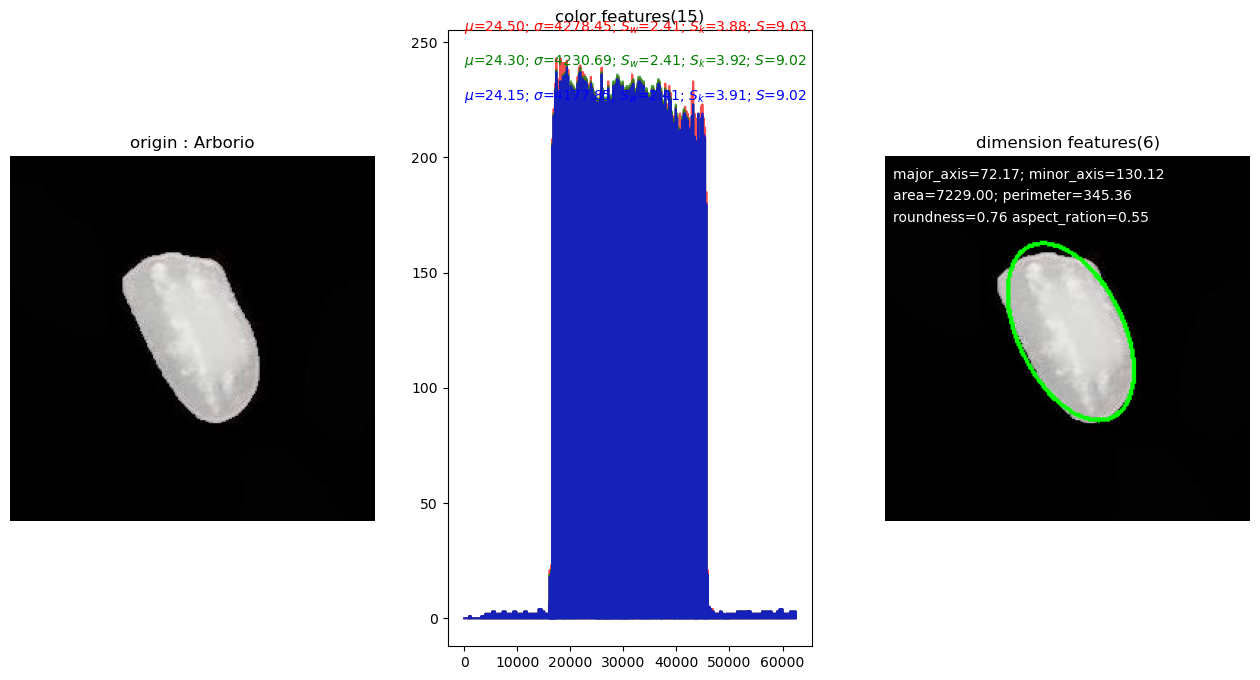

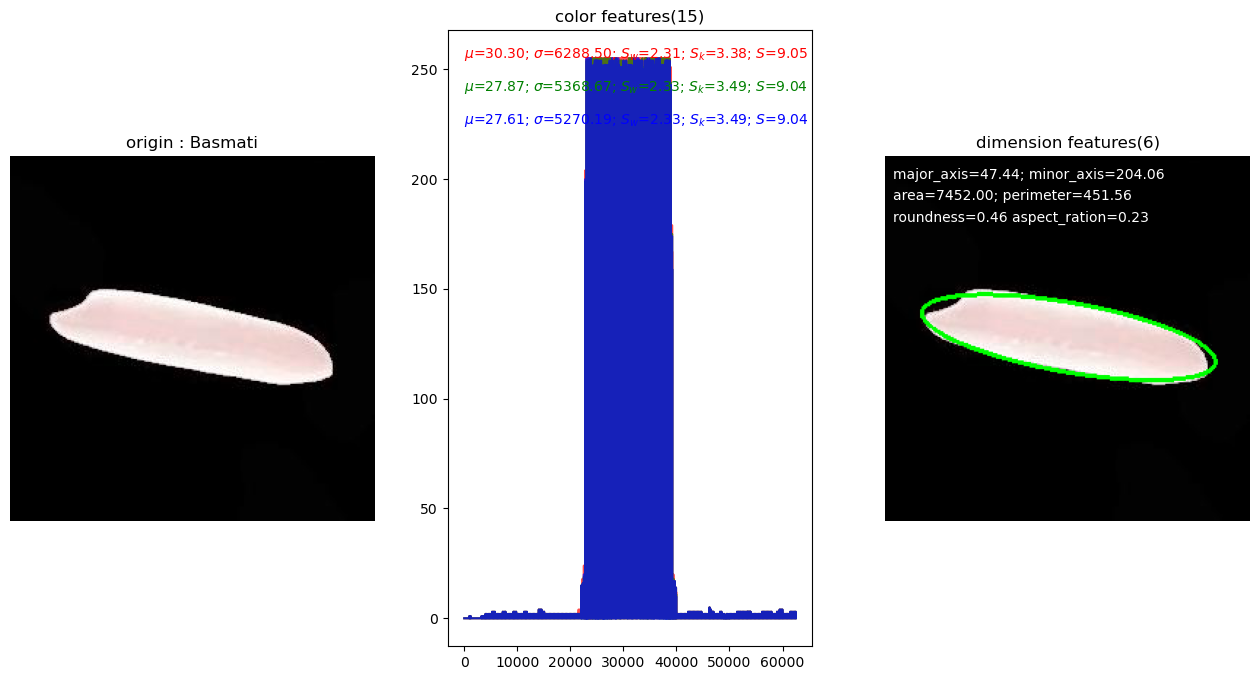

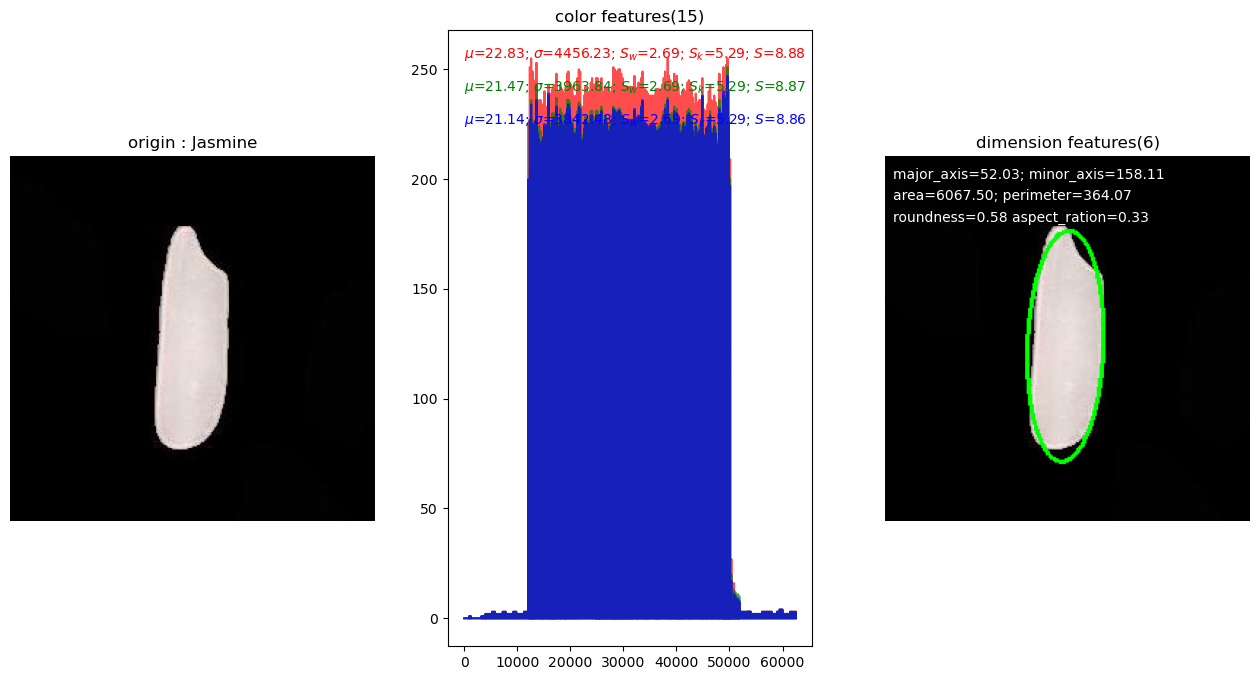

In [9]:
# visualize example image of each rice species with features
for folder, label in zip(data, labels):
    idx = np.random.choice(len(folder), 1)[0]
    img = folder[idx]
    visualize_features(img, label)

In [10]:
# features dataframe preparation

features_label = ["label", 
                  "r_mean", "g_mean", "b_mean", 
                  "r_var", "g_var", "b_var", 
                  "r_skew", "g_skew", "b_skew",
                  "r_kurt", "g_kurt", "b_kurt", 
                  "r_entropy", "g_entropy", "b_entropy",
                  "major_axis", "minor_axis", "area", "perimeter", "roundness", "aspect_ration"]




features = []
for folder, label in zip(data, labels):
    for img in folder:
        color_features, dimension_features = extract_features(img)
        [r_mean, g_mean, b_mean], [r_var, g_var, b_var], [r_skew, g_skew, b_skew], [r_kurt, g_kurt, b_kurt], [r_entropy, g_entropy, b_entropy] = color_features
        major_axis, minor_axis, area, perimeter, roundness, aspect_ration = dimension_features
        feature = np.array([label, 
                    r_mean, g_mean, b_mean, r_var, g_var, b_var, r_skew, g_skew, b_skew, r_kurt, g_kurt, b_kurt, r_entropy, g_entropy, b_entropy, 
                    major_axis, minor_axis, area, perimeter, roundness, aspect_ration])
        features.append(feature)
        

features = np.asarray(features)

features_df = pd.DataFrame(features, columns=features_label)

features_df.sample(10)

,label,r_mean,g_mean,b_mean,r_var,g_var,b_var,r_skew,g_skew,b_skew,...,b_kurt,r_entropy,g_entropy,b_entropy,major_axis,minor_axis,area,perimeter,roundness,aspect_ration
164,Basmati,27.502208,26.10184,26.046528,5308.512043124736,4812.860716614399,4794.354091145218,2.366137606310776,2.378880235975208,2.3793048283840283,...,3.737418431278816,9.03549244094309,9.027389691353864,9.026627366124988,47.96690368652344,206.09976196289062,7291.5,443.2863585948944,0.4662920494366758,0.23273633714899747
191,Basmati,32.00688,29.055008,29.093856,6614.5718246656015,5494.604398119936,5507.372343051264,2.23051208685917,2.249624211200553,2.248556576194029,...,3.1287985531891405,9.103341167216723,9.094655500461831,9.094769801283439,49.921485900878906,204.97911071777344,7873.5,451.54624485969543,0.4852585832565257,0.24354426032032878
119,Basmati,35.390784,32.739504,32.97352,7271.038583865344,6280.090173833983,6368.741362809599,2.0631702656490574,2.071264517819059,2.0704107594899117,...,2.3263388642555114,9.181685855455994,9.167820383689843,9.167862382727042,50.43488693237305,227.00071716308594,8661.0,496.8771975040436,0.44083875699262626,0.2221794167114402
51,Arborio,31.524928,30.996144,31.06192,5800.660482594816,5638.037313131263,5659.147205913601,2.087163752648302,2.092403992320899,2.091375972280058,...,2.434649450705911,9.188490222211076,9.180660190025275,9.181089556302322,77.24655151367188,144.42071533203125,8669.5,388.9188268184662,0.7202545009428108,0.5348716860741048
81,Arborio,23.432528,23.088336,23.113296,4717.914375529218,4607.950644751103,4616.574860016384,2.697328522260089,2.702610290938971,2.702014691603796,...,5.360483018845018,8.867823935834087,8.857994401528748,8.858232957020457,71.80962371826172,112.0053482055664,6091.5,309.8650041818619,0.7972399478163984,0.6411267396487853
114,Basmati,33.00048,31.438848,31.488848,6354.7154557696,5796.538772432895,5816.441907632898,2.0741530404061557,2.0822089733756433,2.081268688473667,...,2.3867167384027628,9.178377476936534,9.171723815817922,9.170695423304139,51.56244659423828,224.93988037109375,8658.0,485.3868639469147,0.4617973196432385,0.22922767856537188
260,Jasmine,23.135776,21.800096,21.611216,4539.008252877825,4055.050054390784,3986.0267190013433,2.678070022949243,2.6796877206799694,2.6798240135072335,...,5.226840635131817,8.881381776958815,8.8706339205596,8.870057433354921,51.349273681640625,153.63804626464844,6109.5,365.17871272563934,0.5757111310960565,0.3342223813051436
134,Basmati,25.831904,24.139328,24.104736,5559.769151734784,4896.928075708415,4883.261318370302,2.6403187458456863,2.6513258567397386,2.6500765393406347,...,5.074370181519313,8.894525748623337,8.881460556080684,8.88043411479886,44.75007629394531,180.72439575195312,6204.0,397.1370825767517,0.49431156449946995,0.24761502788680198
14,Arborio,27.980832,26.781088,26.77608,5337.392720587776,4930.870797536257,4925.570483833601,2.3272204635620266,2.337625032462429,2.33532111765036,...,3.532510551068415,9.06168058968082,9.050084230139362,9.050511782076324,75.14199829101562,129.7519989013672,7536.5,355.6639940738678,0.748686091074533,0.5791201594368953
286,Jasmine,41.865424,40.528736,36.143584,7674.6837933002225,7215.466966242305,5729.862519634943,1.6674975516238646,1.6693539441417051,1.6691078994901802,...,0.8100593123260111,9.404900290684543,9.400949766425962,9.404282768905103,69.46863555908203,210.9505157470703,11103.5,498.8010767698288,0.5608090278855109,0.329312470808912


In [11]:
# save extracted features as .csv
features_df.to_csv('../training_data/features.csv', index=False)